<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [104]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [94]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\kljaj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


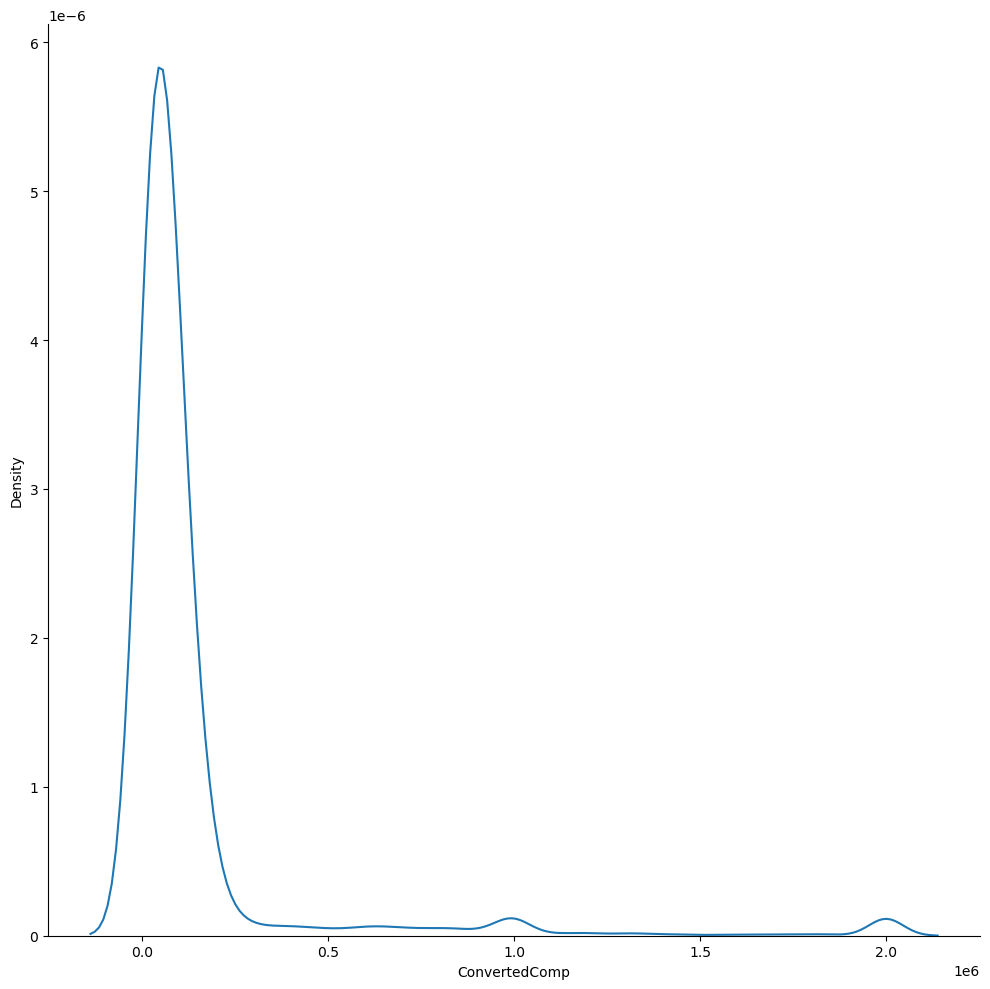

In [107]:
# your code goes here
sns.displot(df['ConvertedComp'], kind="kde", height=10)


Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

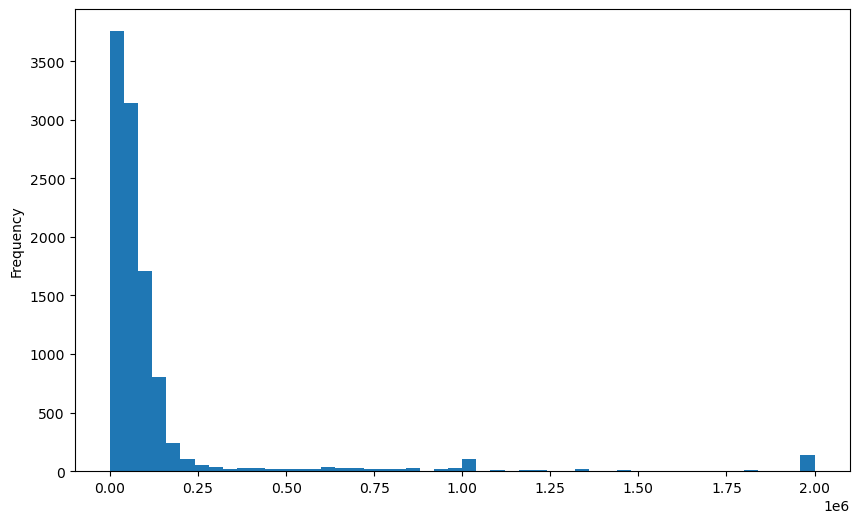

In [110]:
# your code goes here
df['ConvertedComp'].plot(kind='hist',figsize=(10,6),bins=50)

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [21]:
# your code goes here
df.groupby('Gender')['Respondent'].sum()


Gender
Man                                                            131232821
Man;Non-binary, genderqueer, or gender non-conforming             366294
Non-binary, genderqueer, or gender non-conforming                 710530
Woman                                                            8813130
Woman;Man                                                         125877
Woman;Man;Non-binary, genderqueer, or gender non-conforming        24456
Woman;Non-binary, genderqueer, or gender non-conforming           154596
Name: Respondent, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here
df.groupby(df['Gender']=='Woman')['ConvertedComp'].median()

Gender
False    57746.0
True     57708.0
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [46]:
# your code goes here
df['Age'].describe()
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


<Axes: ylabel='Frequency'>

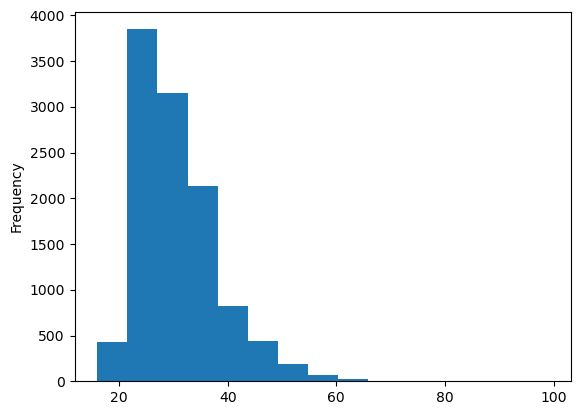

In [52]:
# your code goes here
df_age=df['Age']

df_age.plot(kind='hist',bins=15)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: xlabel='Age'>

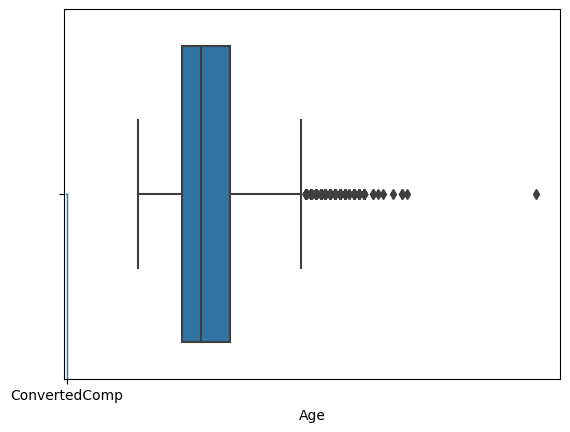

In [105]:
# your code goes here



df['ConvertedComp'].plot(kind='box')
sns.boxplot(x='Age',data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [95]:
# your code goes here
converted_comp=df['ConvertedComp']
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q3)
print(Q1)


73132.0
100000.0
26868.0


Find out the upper and lower bounds.


In [97]:
# your code goes here
lower_bound=Q1 - (1.5 * IQR)
upper_bound=Q3 + (1.5 * IQR)
print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)


Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [98]:
# your code goes here
outliers= (converted_comp<lower_bound) | (converted_comp>upper_bound)
numberOf_outliers=outliers.sum()
numberOf_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [106]:
# your code goes here
outliersIndex = df[(df.ConvertedComp < lower_bound) | (df.ConvertedComp > upper_bound)]

#df_noOutliers = df.drop(outliersIndex,axis=0)
df_noOutliers.shape
df_noOutliers.ConvertedComp.mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [43]:
# your code goes here
dfnum=df.select_dtypes((int,float))
dfnum.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
